<a href="https://colab.research.google.com/github/myconcordia/COMP478/blob/main/EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Edge Detection**

Image edge detection is a technique in digital image processing that aims to identify the boundaries or edges of objects within an image. The edges correspond to the areas of the image where the intensity or color changes rapidly, and they often provide important information about the structure and content of the image.

There are several methods for detecting edges in an image, but most of them involve some form of gradient calculation. A gradient is a measure of the rate of change of a signal, such as the intensity of an image pixel. The idea behind edge detection is to look for places where the gradient of the image is particularly strong, indicating the presence of an edge.

One common method for edge detection is the Sobel operator, which calculates the gradient of the image using a small convolution kernel. The kernel consists of two parts, one for detecting vertical edges and one for detecting horizontal edges. By convolving the kernel with the image, the Sobel operator can identify the regions where the gradient is highest in both the horizontal and vertical directions, and thus where edges are likely to be located.

Other methods for edge detection include the Canny edge detector, which uses a more complex algorithm to identify edges with high precision, and the Laplacian of Gaussian (LoG) filter, which applies a combination of Gaussian smoothing and Laplacian differentiation to enhance the edges in an image.

**Import Python modules**

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

**Create a simple image containing a square**

In [21]:
I = np.zeros((512, 512), dtype=np.uint8)
I[156:356, 156:356] = 255

In [22]:
# Display image size and type
I.shape, I.dtype

((512, 512), dtype('uint8'))

The **plt.imshow** function normalizes data so that min(data) gets mapped to 0 and max(data) gets mapped to 1. Then, the colormap (e.g., 'gray', 'jet') is applied.

(<matplotlib.image.AxesImage at 0x7fd4792d5910>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4792900a0>)

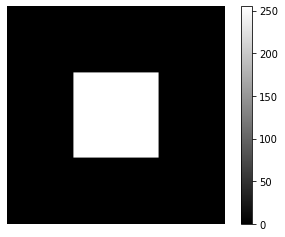

In [23]:
plt.imshow(I,'gray'), plt.axis('off'), plt.colorbar()

**Sobel edge detection with cv2.Sobel**

The output of the Sobel filter is a gradient image that shows the strength and direction of the edges in the original image. High gradient magnitudes correspond to areas of rapid change in intensity, which are likely to be edges.

In [24]:
# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 

# Sobel Edge Detection on the x-axis and y-axis
Sobelx = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the x-axis (dx=1, dy=0)
Sobely = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the y-axis (dx=0, dy=1)

If our output datatype is cv2.CV_8U, it will make all negative values 0. To prevent this issue, we specify the output to some higher forms such as cv2.CV_64F, and then take the absolute value, followed by converting back to cv2.CV_8U if needed.

The gradient images are now of the floating point data type, so we need to convert them back a to unsigned 8-bit integer representation so other OpenCV functions can operate (i.e. using **cv2.convertScaleAbs**, which scales, computes absolute values and converts the result to 8-bit)

(<matplotlib.image.AxesImage at 0x7fd47c5d6460>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd47c601be0>)

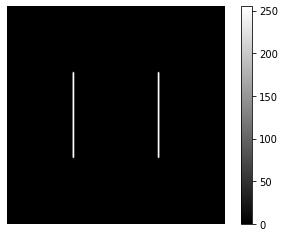

In [14]:
# Display Sobel Edge Detection Image on the x-axis (vertical edges)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd47c56b100>, (-0.5, 511.5, 511.5, -0.5))

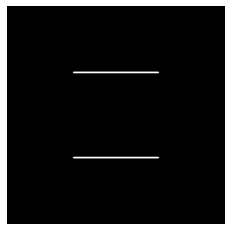

In [15]:
# Display Sobel Edge Detection Image on the y-axis (horizontal edges)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fd47c527ca0>, (-0.5, 511.5, 511.5, -0.5))

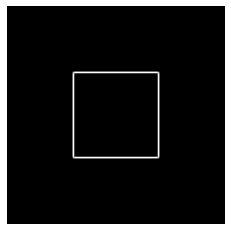

In [16]:
# Display Gradient Magnitude
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off')

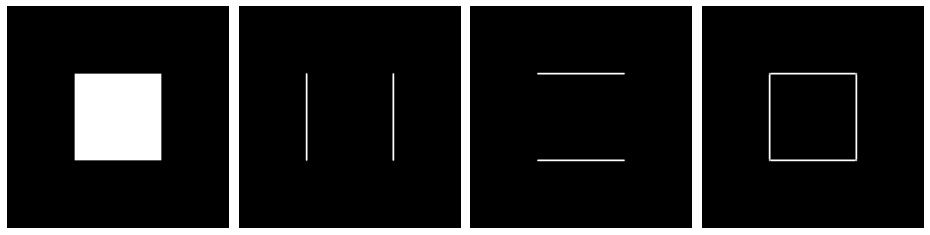

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13))
plt.subplot(141), plt.imshow(I, 'gray'), plt.axis('off')
plt.subplot(142), plt.imshow(Gx,'gray'), plt.axis('off')
plt.subplot(143), plt.imshow(Gy,'gray'), plt.axis('off')
plt.subplot(144), plt.imshow(G,'gray'), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

**Sobel Edge Detection: Image with Text**

(<matplotlib.image.AxesImage at 0x7fd478d13ac0>, (-0.5, 255.5, 255.5, -0.5))

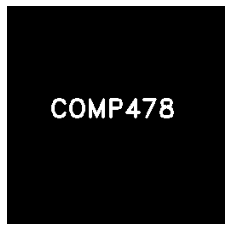

In [29]:
img = np.zeros((256, 256), dtype = np.uint8) 
I = cv2.putText(img, 'COMP478', (50,130), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255), 2)
plt.imshow(I,'gray'), plt.axis('off')

In [30]:
# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 

# Sobel Edge Detection on the x-axis and y-axis
Sobelx = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X-axis (dx=1, dy=0)
Sobely = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y-axis (dx=0, dy=1)

(<matplotlib.image.AxesImage at 0x7fd478cdd490>, (-0.5, 255.5, 255.5, -0.5))

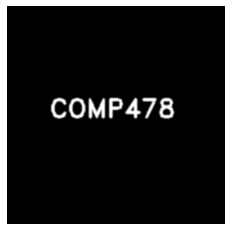

In [31]:
# Display blurred image
plt.imshow(I_blur,'gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fd4793495e0>,
 (-0.5, 255.5, 255.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4792b5910>)

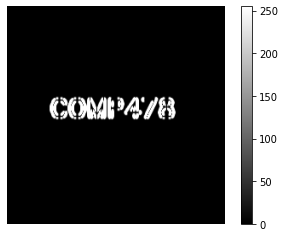

In [32]:
# Display Sobel Edge Detection Images
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd47bc74820>,
 (-0.5, 255.5, 255.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd47bc2d070>)

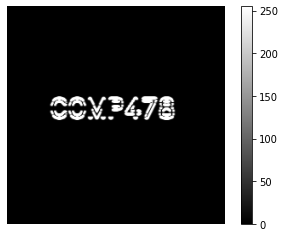

In [33]:
# Display Sobel Edge Detection Images
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd47bc07250>,
 (-0.5, 255.5, 255.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd47bbb39a0>)

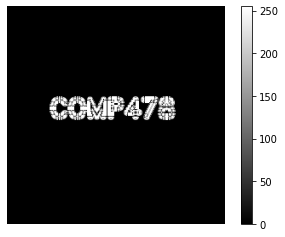

In [34]:
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

**Mount Google Drive: First mount and authenticate yourself**

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [84]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
import os
os.chdir("/content/drive/My Drive/")
os.listdir()

['Colab Notebooks', 'data', 'images', 'trimesh', 'Ericsson', 'amazon']

(<matplotlib.image.AxesImage at 0x7fd47837dc10>, (-0.5, 639.5, 479.5, -0.5))

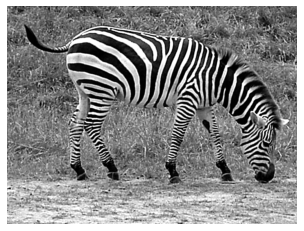

In [85]:
I = cv2.imread('./images/Zebra.png')
# Convert to graycsale
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I,'gray'), plt.axis('off')


In [86]:
# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 
 
# Sobel Edge Detection
#  If dx=1 and dy=0, we compute the 1st derivative Sobel image in the x-direction
Sobelx = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X-axis (dx=1, dy=0)
Sobely = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y-axis (dx=0, dy=1)

(<matplotlib.image.AxesImage at 0x7fd47834ec40>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd478304850>)

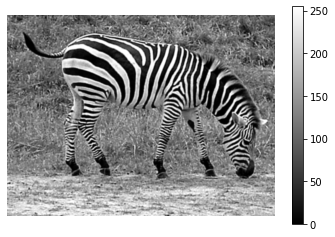

In [87]:
# Display blurred image
plt.imshow(I_blur,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd4786a4400>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4782c5eb0>)

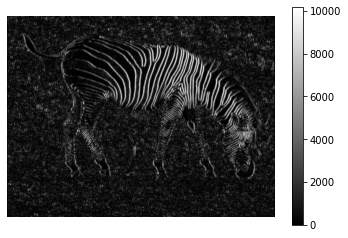

In [89]:
# Display Sobel Edge Detection Images
Gx = np.abs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd4781dd190>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4781888e0>)

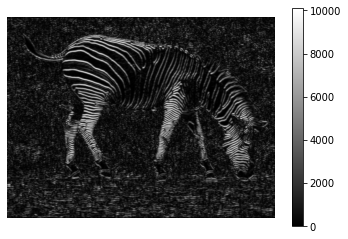

In [90]:
# Display Sobel Edge Detection Images
Gy = np.abs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd47815fb80>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd478115310>)

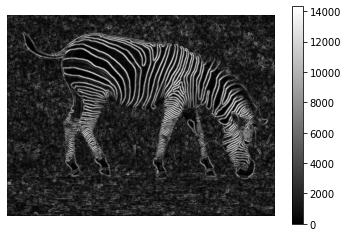

In [91]:
# Combine the gradient representations into a single image (i.e. gradient magnitude)
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f59ba2b7790>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f59ba26c3a0>)

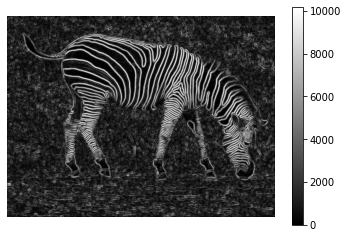

In [ ]:
# Display Gradient Magnitude
G = cv2.magnitude(Sobelx, Sobely)
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

**Sobel edge detection with Filter2D in OpenCV**

In [ ]:
I = cv2.imread('./images/Zebra.png')
I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
k = 5
I_blur = cv2.bilateralFilter(I_gray, k, k * 2, k / 2) # To perserve edges

# 3x3 sobel filters for edge detection
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
                    
sobel_y = np.array([[-1, -2, -1], 
                    [0,  0,  0], 
                    [1,  2,  1]])

# Filter the blurred grayscale images using filter2D
Sobelx = cv2.filter2D(I_blur, cv2.CV_64F, sobel_x)  
Sobely = cv2.filter2D(I_blur, cv2.CV_64F, sobel_y)


(<matplotlib.image.AxesImage at 0x7feb455308b0>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb454eb100>)

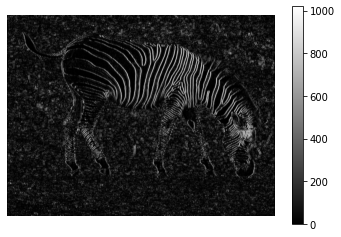

In [ ]:
# Display Sobel Edge Detection Images
Gx = np.abs(Sobelx)
#Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb452edaf0>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb452a7280>)

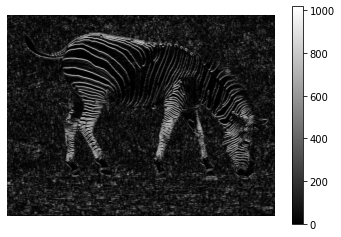

In [ ]:
Gy = np.abs(Sobely)
#Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb45403fa0>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb4543b730>)

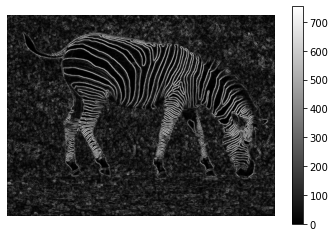

In [ ]:
# Combine the gradient representations into a single image (magnitude)
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb45183070>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb451b8c10>)

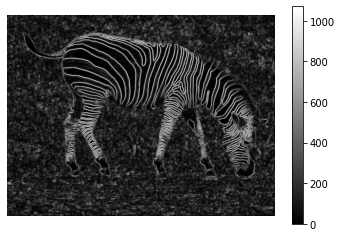

In [ ]:
#Gradient magnitude
G = cv2.magnitude(Sobelx, Sobely) 
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

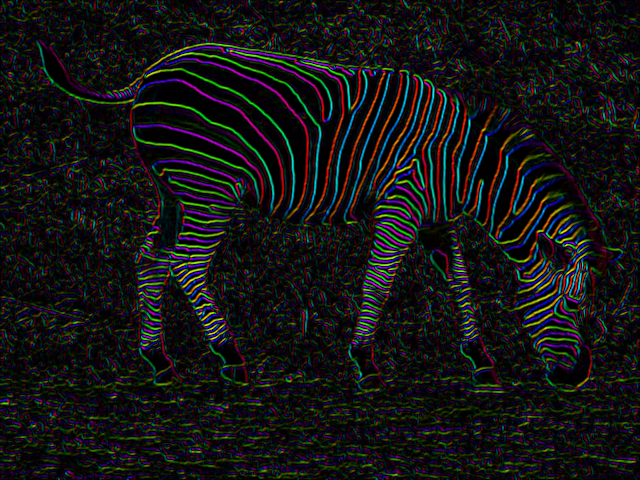

In [ ]:
#Compute and display the gradient orientation
orien = cv2.phase(Sobelx, Sobely, angleInDegrees=True)
orien = orien / 2. # Go from 0:360 to 0:180 
hsv = np.zeros_like(I)
hsv[..., 0] = orien # H (in OpenCV between 0:180)
hsv[..., 1] = 255 # S
hsv[..., 2] = cv2.normalize(G, None, 0, 255, cv2.NORM_MINMAX) # V 0:255

bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(bgr)

(<matplotlib.image.AxesImage at 0x7feb450a4220>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb4504bdf0>)

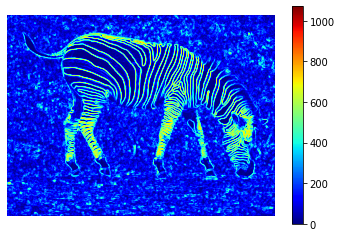

In [ ]:
# Compute the gradient magnitude (alternative solution)
magnitude = np.sqrt((Sobelx ** 2) + (Sobely ** 2))
#magnitude = cv2.convertScaleAbs(magnitude)
plt.imshow(magnitude,'jet'), plt.axis('off'), plt.colorbar()

Using the Jet colormap, values that are closer to the blue range are very small. Values that are closer to the yellow/red range are quite large (relative to the rest of the values). Taking a look at the outlines/borders of the stripes we can see that these pixels have a large gradient magnitude due to the fact that they contain edge information.

(<matplotlib.image.AxesImage at 0x7feb45029a90>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb44fdd6a0>)

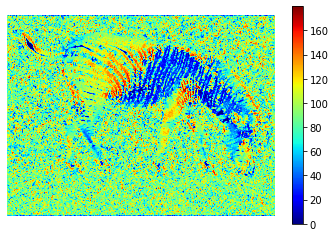

In [ ]:
# Compute the gradient orientation (alternative solution)
# We use the modulo operation (% 180) to convert any interval to [0, 180]
orientation = np.arctan2(Sobely, Sobelx) * (180 / np.pi) % 180
#orientation = cv2.convertScaleAbs(orientation)
plt.imshow(orientation,'jet'), plt.axis('off'), plt.colorbar()

The orientation values fall into the range [0, 180], where values closer to zero shown as blue and values closer to 180 as red. 

**Sobel filter example (vertical edge)**

In [35]:
I = np.array([[0, 0, 10, 10, 10], 
              [0, 0, 10, 10, 10], 
              [0, 0, 10, 10, 10], 
              [0, 0, 10, 10, 10], 
              [0, 0, 10, 10, 10]])
I = np.uint8(I)
# 3x3 sobel filters for edge detection
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
                    
sobel_y = np.array([[-1, -2, -1], 
                    [0,  0,  0], 
                    [1,  2,  1]])

# Filter the blurred grayscale images using filter2D with zero-padding
Sobelx = cv2.filter2D(I, cv2.CV_64F, sobel_x, borderType=cv2.BORDER_CONSTANT)  
Sobely = cv2.filter2D(I, cv2.CV_64F, sobel_y, borderType=cv2.BORDER_CONSTANT)

(<matplotlib.image.AxesImage at 0x7fd47baa4b80>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd47ba5d310>)

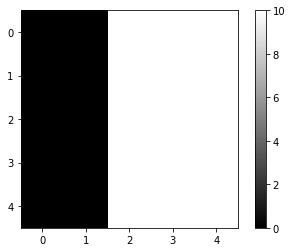

In [37]:
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

In [38]:
print(Sobelx)

[[  0.  30.  30.   0. -30.]
 [  0.  40.  40.   0. -40.]
 [  0.  40.  40.   0. -40.]
 [  0.  40.  40.   0. -40.]
 [  0.  30.  30.   0. -30.]]


In [39]:
print(Sobely)

[[  0.  10.  30.  40.  30.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0. -10. -30. -40. -30.]]


(<matplotlib.image.AxesImage at 0x7fd47ba3acd0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd47b9f2460>)

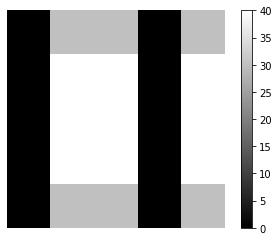

In [40]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd478c3b220>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd478c649a0>)

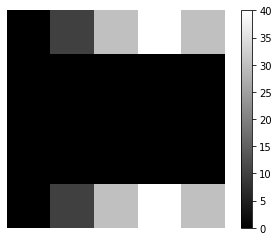

In [41]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd478bc76a0>, (-0.5, 4.5, 4.5, -0.5))

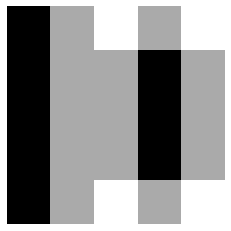

In [42]:
# Display Gradient Magnitude
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off')

**Using border values to pad the image (default)**

In [70]:
I = np.array([[0, 0, 10, 10, 10], 
              [0, 0, 10, 10, 10], 
              [0, 0, 10, 10, 10], 
              [0, 0, 10, 10, 10], 
              [0, 0, 10, 10, 10]])
I = np.uint8(I)
# 3x3 sobel filters for edge detection
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
                    
sobel_y = np.array([[-1, -2, -1], 
                    [0,  0,  0], 
                    [1,  2,  1]])

# Filter the blurred grayscale images using filter2D with border values to pad the image (default).
Sobelx = cv2.filter2D(I, cv2.CV_64F, sobel_x)  
Sobely = cv2.filter2D(I, cv2.CV_64F, sobel_y)

(<matplotlib.image.AxesImage at 0x7fd478534340>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4784da070>)

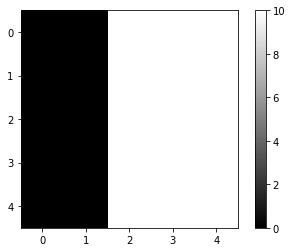

In [71]:
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

In [72]:
print(Sobelx)

[[ 0. 40. 40.  0.  0.]
 [ 0. 40. 40.  0.  0.]
 [ 0. 40. 40.  0.  0.]
 [ 0. 40. 40.  0.  0.]
 [ 0. 40. 40.  0.  0.]]


In [68]:
print(Sobely)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


(<matplotlib.image.AxesImage at 0x7fd4785a2070>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd47854c7c0>)

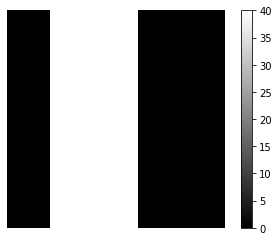

In [69]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd478ab6460>, (-0.5, 4.5, 4.5, -0.5))

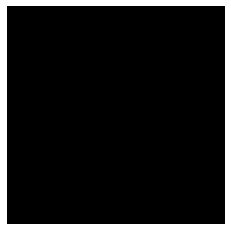

In [49]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy, 'gray'), plt.axis('off')

[[ 0 40 40  0  0]
 [ 0 40 40  0  0]
 [ 0 40 40  0  0]
 [ 0 40 40  0  0]
 [ 0 40 40  0  0]]


(<matplotlib.image.AxesImage at 0x7fd47bbdf580>, (-0.5, 4.5, 4.5, -0.5))

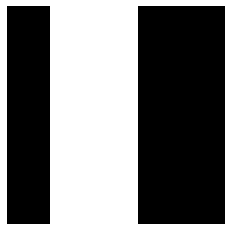

In [50]:
# Display Gradient Magnitude
G = Gx + Gy
print(G)
plt.imshow(G,'gray'), plt.axis('off')

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


(<matplotlib.image.AxesImage at 0x7fd47baee160>, (-0.5, 4.5, 4.5, -0.5))

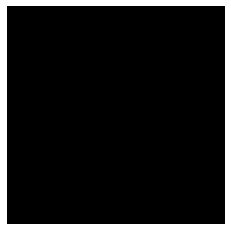

In [51]:
# Compute the gradient orientation (% 180 is the modulo operation)
orientation = np.arctan2(Sobely, Sobelx) * (180 / np.pi) % 180
print(orientation)

#orientation = cv2.convertScaleAbs(orientation)
plt.imshow(orientation,'gray'), plt.axis('off')


**Another Sobel edge detection example (horizontal edge)**

In [53]:
I = np.array([[0, 0, 0, 0, 0], 
              [0, 0, 0, 0, 0], 
              [10, 10, 10, 10, 10], 
              [10, 10, 10, 10, 10], 
              [10, 10, 10, 10, 10]])
I = np.uint8(I)
# 3x3 sobel filters for edge detection
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
                    
sobel_y = np.array([[-1, -2, -1], 
                    [0,  0,  0], 
                    [1,  2,  1]])

# Filter the grayscale images using filter2D with with border values to pad the image (default).
Sobelx = cv2.filter2D(I, cv2.CV_64F, sobel_x)  
Sobely = cv2.filter2D(I, cv2.CV_64F, sobel_y)

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


(<matplotlib.image.AxesImage at 0x7f59c239c2b0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f59c23c5a00>)

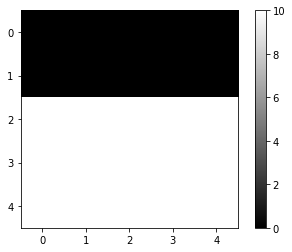

In [ ]:
print(I)
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

In [ ]:
print(Sobelx)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
print(Sobely)

[[ 0.  0.  0.  0.  0.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


(<matplotlib.image.AxesImage at 0x7f59c22819a0>, (-0.5, 4.5, 4.5, -0.5))

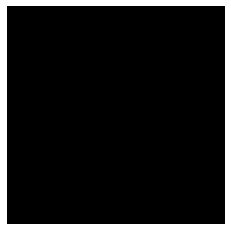

In [ ]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
print(Gx)
plt.imshow(Gx,'gray'), plt.axis('off')

[[ 0  0  0  0  0]
 [40 40 40 40 40]
 [40 40 40 40 40]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


(<matplotlib.image.AxesImage at 0x7f59c224a580>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f59c21ff190>)

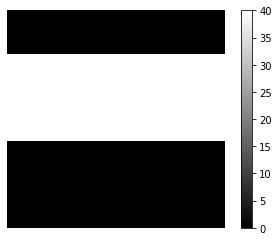

In [ ]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
print(Gy)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

[[ 0  0  0  0  0]
 [40 40 40 40 40]
 [40 40 40 40 40]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


(<matplotlib.image.AxesImage at 0x7f59c215c3d0>, (-0.5, 4.5, 4.5, -0.5))

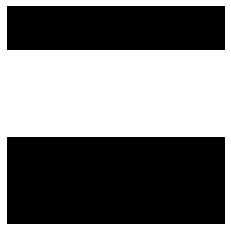

In [ ]:
# Display Gradient Magnitude
G = Gx + Gy
print(G)
plt.imshow(G,'gray'), plt.axis('off')

[[ 0.  0.  0.  0.  0.]
 [90. 90. 90. 90. 90.]
 [90. 90. 90. 90. 90.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


(<matplotlib.image.AxesImage at 0x7f59c2768a00>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f59c260a8b0>)

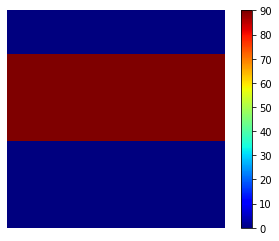

In [ ]:
# Compute the gradient orientation (alternative solution)
orientation = np.arctan2(Sobely, Sobelx) * (180 / np.pi) % 180
print(orientation)

#orientation = cv2.convertScaleAbs(orientation)
plt.imshow(orientation,'jet'), plt.axis('off'), plt.colorbar()

**Another Sobel edge detection example**

In [54]:
I = np.array([[0, 0, 0, 0, 10], 
              [0, 0, 0, 10, 10], 
              [0, 0, 10, 10, 10], 
              [0, 10, 10, 10, 10], 
              [10, 10, 10, 10, 10]])
I = np.uint8(I)
# 3x3 sobel filters for edge detection
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
                    
sobel_y = np.array([[-1, -2, -1], 
                    [0,  0,  0], 
                    [1,  2,  1]])

# Filter the grayscale images using filter2D with border values to pad the image (default).
Sobelx = cv2.filter2D(I, cv2.CV_64F, sobel_x)  
Sobely = cv2.filter2D(I, cv2.CV_64F, sobel_y)

[[ 0  0  0  0 10]
 [ 0  0  0 10 10]
 [ 0  0 10 10 10]
 [ 0 10 10 10 10]
 [10 10 10 10 10]]


(<matplotlib.image.AxesImage at 0x7fd47b9ada90>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd478997d30>)

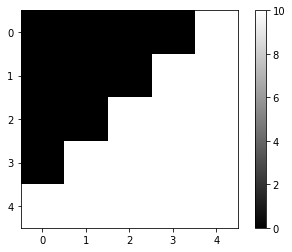

In [55]:
print(I)
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

In [56]:
print(Sobelx)

[[ 0.  0. 20. 40.  0.]
 [ 0. 10. 30. 30.  0.]
 [ 0. 30. 30. 10.  0.]
 [ 0. 30. 10.  0.  0.]
 [ 0. 20.  0.  0.  0.]]


In [57]:
print(Sobely)

[[ 0.  0.  0.  0.  0.]
 [ 0. 10. 30. 30. 20.]
 [20. 30. 30. 10.  0.]
 [40. 30. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


[[ 0  0 20 40  0]
 [ 0 10 30 30  0]
 [ 0 30 30 10  0]
 [ 0 30 10  0  0]
 [ 0 20  0  0  0]]


(<matplotlib.image.AxesImage at 0x7fd4789006a0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd478929df0>)

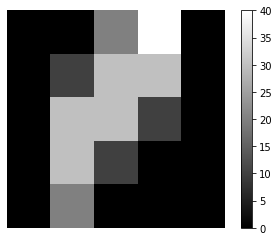

In [58]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
print(Gx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

[[ 0  0  0  0  0]
 [ 0 10 30 30 20]
 [20 30 30 10  0]
 [40 30 10  0  0]
 [ 0  0  0  0  0]]


(<matplotlib.image.AxesImage at 0x7fd478888b80>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd478840340>)

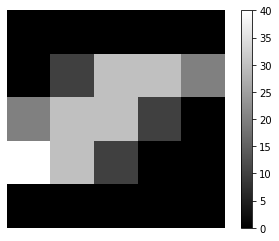

In [59]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
print(Gy)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

[[ 0  0 20 40  0]
 [ 0 20 60 60 20]
 [20 60 60 20  0]
 [40 60 20  0  0]
 [ 0 20  0  0  0]]


(<matplotlib.image.AxesImage at 0x7fd478822190>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4787cd910>)

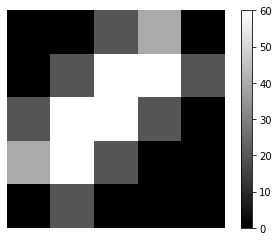

In [60]:
# Display Gradient Magnitude
G = Gx + Gy
print(G)
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

[[ 0.  0.  0.  0.  0.]
 [ 0. 45. 45. 45. 90.]
 [90. 45. 45. 45.  0.]
 [90. 45. 45.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


(<matplotlib.image.AxesImage at 0x7f59c1d6c5b0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f59c1d1ad00>)

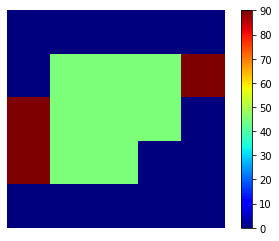

In [ ]:
# Compute the gradient orientation (alternative solution)
orientation = np.arctan2(Sobely, Sobelx) * (180 / np.pi) % 180
print(orientation)

#orientation = cv2.convertScaleAbs(orientation)
plt.imshow(orientation,'jet'), plt.axis('off'), plt.colorbar()

**Laplacian filter example**

In [61]:
I = np.array([[0, 0, 0, 0, 10], 
              [0, 0, 0, 10, 10], 
              [0, 0, 10, 10, 10], 
              [0, 10, 10, 10, 10], 
              [10, 10, 10, 10, 10]])
I = np.uint8(I)

# Laplacian kernel
w = np.array([[0, 1, 0], 
              [1, -4, 1], 
              [0, 1, 0]])                  

# Filter the grayscale image using filter2D with with border values to pad the image (default).
L = cv2.filter2D(I, cv2.CV_64F, w)  
print(L)

[[  0.   0.   0.  30. -20.]
 [  0.   0.  20. -20.   0.]
 [  0.  20. -20.   0.   0.]
 [ 30. -20.   0.   0.   0.]
 [-20.   0.   0.   0.   0.]]


In [62]:
#Alternative way (same result): cv2.Laplacian employs the kernel np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
L = cv2.Laplacian(I, cv2.CV_64F)  
print(L)

[[  0.   0.   0.  30. -20.]
 [  0.   0.  20. -20.   0.]
 [  0.  20. -20.   0.   0.]
 [ 30. -20.   0.   0.   0.]
 [-20.   0.   0.   0.   0.]]


[[ 0  0  0  0 10]
 [ 0  0  0 10 10]
 [ 0  0 10 10 10]
 [ 0 10 10 10 10]
 [10 10 10 10 10]]


(<matplotlib.image.AxesImage at 0x7fd4787a9a30>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4787611c0>)

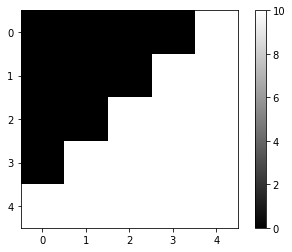

In [63]:
print(I)
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

[[ 0  0  0 30 20]
 [ 0  0 20 20  0]
 [ 0 20 20  0  0]
 [30 20  0  0  0]
 [20  0  0  0  0]]


(<matplotlib.image.AxesImage at 0x7fd4786bcbb0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4786f5340>)

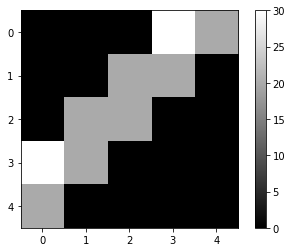

In [64]:
print(cv2.convertScaleAbs(L))
plt.imshow(cv2.convertScaleAbs(L),'gray'), plt.axis('on'), plt.colorbar()

**Second-Order Derivative Edge Detection**

(<matplotlib.image.AxesImage at 0x7fd4727c9700>, (-0.5, 511.5, 511.5, -0.5))

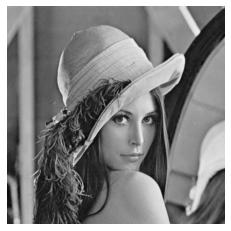

In [93]:
I = cv2.imread('./images/lena.png')
# Convert to graycsale
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I,'gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fd4725bfcd0>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd4725f7460>)

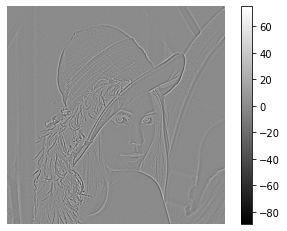

In [99]:
# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 
L = cv2.Laplacian(I_blur, cv2.CV_64F) 
plt.imshow(L,'gray'), plt.axis('off'), plt.colorbar()

In [100]:
# Laplacian of Gaussian kernel
LoG = np.array([[0, 1, 1, 2, 2, 2, 1, 1, 0], 
              [1, 2, 4, 5, 5, 5, 4, 2, 1], 
              [1, 4, 5, 3, 0, 3, 5, 4, 1],
              [2, 5, 3, -12, -24, -12, 3, 5, 2],
              [2, 5, 0, -24, -40, -24, 0, 5, 2],
              [2, 5, 3, -12, -24, -12, 3, 5, 2],
              [1, 4, 5, 3, 0, 3, 5, 4, 1],
              [1, 2, 4, 5, 5, 5, 4, 2, 1],
              [0, 1, 1, 2, 2, 2, 1, 1, 0]])                  

# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 

# Filter the grayscale image using filter2D with with border values to pad the image (default).
L = cv2.filter2D(I_blur, cv2.CV_64F, LoG)  

(<matplotlib.image.AxesImage at 0x7fd472554f70>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd472508700>)

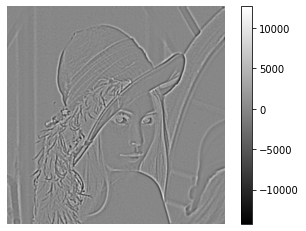

In [101]:
plt.imshow(L,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7fd4724e1760>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7fd47248f040>)

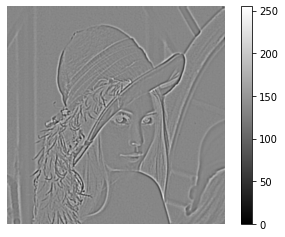

In [102]:
#Normalize L to the range [0, 255]
Ln = (255*(L - np.min(L))/np.ptp(L)).astype(np.uint8) 
plt.imshow(Ln,'gray'), plt.axis('off'), plt.colorbar()

**Difference of Gaussian Kernel**

In [ ]:
# Difference of Gaussian kernel
DoG = np.array([[0, 0, -1, -1, -1, 0, 0],
                [0, -2, -3, -3, -3,-2, 0],
                [-1, -3, 5, 5, 5,-3,-1],
                [-1, -3, 5, 16, 5,-3,-1],
                [-1, -3, 5, 5, 5,-3,-1],
                [0, -2, -3, -3, -3,-2, 0],
                [0, 0, -1, -1, -1, 0, 0]])                  

# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 

# Filter the grayscale image using filter2D with with border values to pad the image (default).
D = cv2.filter2D(I_blur, cv2.CV_64F, DoG)  

(<matplotlib.image.AxesImage at 0x7f59bafa7370>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f59baf5a040>)

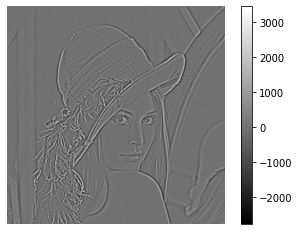

In [ ]:
plt.imshow(D,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f59baf2af40>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f59baedeb50>)

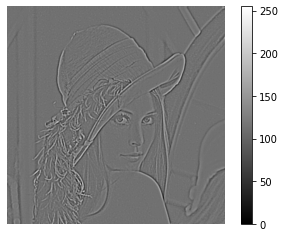

In [ ]:
#Normalize D to the range [0, 255]
Dn = (255*(D - np.min(D))/np.ptp(D)).astype(np.uint8) 
plt.imshow(Dn,'gray'), plt.axis('off'), plt.colorbar()

**Canny Edge Detection**

In [ ]:
I = cv2.imread('./images/lena.png')
# Convert to graycsale
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
  
# Setting parameter values
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
  
# Applying the Canny Edge filter
edge = cv2.Canny(I, t_lower, t_upper)

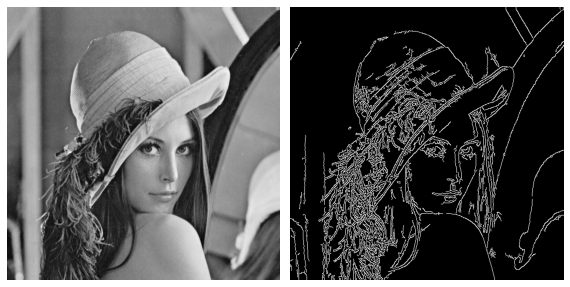

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
plt.subplot(121), plt.imshow(I, 'gray'), plt.axis('off')
plt.subplot(122), plt.imshow(edge,'gray'), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

In [ ]:
# Draw the digit 7 on 30x40 grayscale image: width, height = 30, 40
#img = np.full((height, width), 60, np.uint8)
#cv2.putText(img, '7', (width//2-10, height//2+10), cv2.FONT_HERSHEY_DUPLEX, 1, 255, 2)
#cv2_imshow(img)